In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/distan_lat42.896lon-8.415p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/LESTY2018Y2022.csv",
                          usecols = ["time","visibility_o"],
                          parse_dates=["time"]).set_index("time")

station["visibility_o"].describe()

count    90838.000000
mean      8681.925141
std       2609.865894
min         48.000000
25%       8996.000000
50%       9994.000000
75%       9994.000000
max       9994.000000
Name: visibility_o, dtype: float64

**Station visibility to interval**

In [3]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels = ['<= 1000 m', '> 1000 m']
station["vis_l"] = pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

print(station.sample(20))
print("\nVisibility frequencies.")
station["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

                     visibility_o     vis_l
time                                       
2018-02-15 22:30:00        5005.0  > 1000 m
2022-10-14 09:30:00        7998.0  > 1000 m
2018-09-20 18:30:00        9994.0  > 1000 m
2021-07-26 16:30:00        9994.0  > 1000 m
2022-09-14 22:00:00        9994.0  > 1000 m
2019-02-08 04:30:00        9994.0  > 1000 m
2020-05-30 15:00:00        9994.0  > 1000 m
2018-02-24 08:00:00        9994.0  > 1000 m
2022-12-01 14:30:00        9994.0  > 1000 m
2020-06-03 05:30:00        6003.0  > 1000 m
2021-08-25 01:30:00        9994.0  > 1000 m
2020-10-21 05:30:00        7001.0  > 1000 m
2022-05-14 08:30:00        9994.0  > 1000 m
2019-02-17 23:30:00        2993.0  > 1000 m
2021-06-20 10:30:00        6003.0  > 1000 m
2020-05-21 07:30:00        9994.0  > 1000 m
2020-09-12 01:30:00        9994.0  > 1000 m
2018-12-21 15:30:00        9994.0  > 1000 m
2018-10-09 08:30:00        9994.0  > 1000 m
2018-12-29 04:00:00        9994.0  > 1000 m

Visibility frequencies.


> 1000 m     97%
<= 1000 m     3%
nan           0%
Name: vis_l, dtype: object

**Forecast**

In [4]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,203.429932,0.0,854.856445,4.810002,11.869287,102894.039062,280.189117,0.941392,24051.365234,-0.485709,...,0.000000,-0.000477,0.2,0.000000,0.000000,0.200000,5556.550781,1547.730957,249.389938,273.540863
2018-01-01 02:00:00,215.205261,0.0,896.619629,5.700827,12.852463,102861.617188,280.347931,0.988324,24039.359375,-4.395393,...,26.730000,-14.053461,0.2,0.120898,0.000000,0.200000,5565.350098,1546.713013,249.959381,273.725189
2018-01-01 03:00:00,224.525986,0.0,921.870178,7.366050,16.131567,102839.406250,281.068298,0.952302,24040.320312,-3.568437,...,30.040001,-11.045238,0.2,0.164062,0.000000,0.200000,5573.533203,1546.541992,250.329880,273.646881
2018-01-01 04:00:00,227.065903,0.0,940.589844,8.982346,17.282509,102842.039062,281.655243,0.923813,24042.085938,-1.595969,...,32.810001,-8.397157,0.1,0.437500,0.000000,0.437500,5580.626953,1548.500977,250.527191,273.661194
2018-01-01 05:00:00,231.667892,0.0,983.509766,10.026832,18.146084,102827.226562,282.484192,0.924759,24040.648438,0.638913,...,58.730000,-4.643547,0.1,0.375000,0.000000,0.375000,5585.084961,1548.863037,250.680435,273.858765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,192.131683,0.0,1647.268433,8.436563,14.080066,101383.421875,283.931366,0.971286,4439.524902,6.396758,...,16.520000,-12.663813,0.1,0.484375,0.328125,0.484375,5534.582031,1469.921997,255.214996,277.491058
2022-12-31 20:00:00,210.602203,0.0,1613.758667,5.970586,9.454391,101500.343750,284.023376,0.981433,8239.185547,3.192404,...,50.250000,-0.009562,0.2,0.480000,0.203125,0.480000,5538.076172,1474.437012,255.085251,276.761200
2022-12-31 21:00:00,204.022858,0.0,1617.162964,7.379550,13.501737,101569.578125,284.019989,0.973716,9444.787109,3.996242,...,53.689999,-0.000937,0.1,0.439746,0.203125,0.439746,5541.597168,1477.406982,255.229691,276.760620


**Label meteorological model visibility. Concatenate Station and meteorological model. Few discrepancies between Station (half hours) and Station (only 0 o'clock hours). Less visibilty in half hours**  

In [5]:
#label meteorological model visbility points 0 and 1
model1k["visibility0_l"] = pd.cut(model1k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["visibility1_l"] = pd.cut(model1k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["visibility_o"])

#meteorological model frequencies
print("Meteorological model point 0")
print(df_all1k["visibility0_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))
print("\nMeteorological model point 1")
print(df_all1k["visibility1_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))

#Station frequencies
print("\nActual visibility frequencies o'clock hours")
df_all1k["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

Meteorological model point 0
> 1000 m     91%
<= 1000 m     9%
Name: visibility0_l, dtype: object

Meteorological model point 1
> 1000 m     92%
<= 1000 m     8%
Name: visibility1_l, dtype: object

Actual visibility frequencies o'clock hours


> 1000 m     98%
<= 1000 m     2%
Name: vis_l, dtype: object

**Scatter plot significant meteorological variables and vis_l**

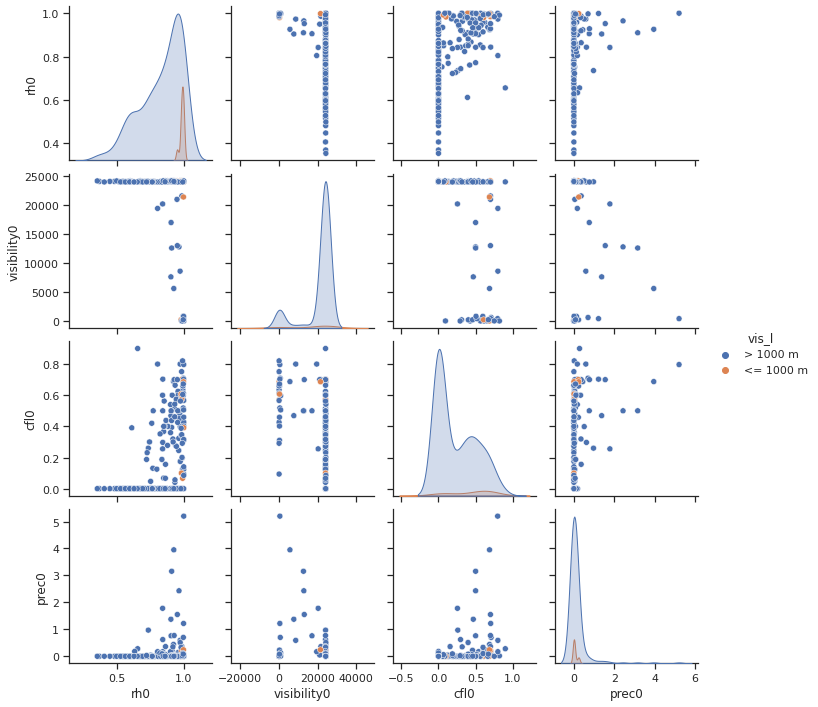

In [7]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["vis_l","rh0","visibility0","cfl0","prec0"]].sample(200), hue="vis_l");

**Scatter plot 3 PCA variables and vis_l**

In [8]:
df_all1k.iloc[:,1:-2].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

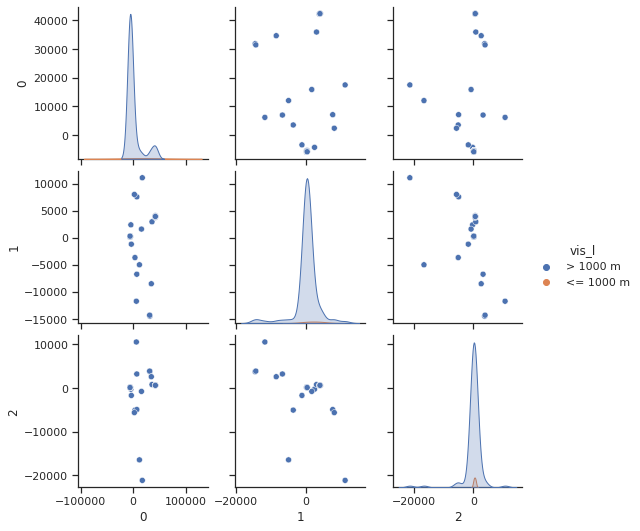

In [9]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:-2]),
                                                        index =df_all1k.index)
df_pca["vis_l"] = df_all1k.vis_l
sns.pairplot(df_pca.sample(100), hue="vis_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [10]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility0_l ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility0_l,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility1_l ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility1_l,output_dict=True)).T)

HSS point 0
visibility0_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            459       574   1033
> 1000 m            3295     37337  40632
All                 3754     37911  41665
Heidke Skill Score: 0.16

Quality report Meteorological model point 0
              precision    recall  f1-score      support
<= 1000 m      0.122270  0.444337  0.191769   1033.00000
> 1000 m       0.984859  0.918906  0.950740  40632.00000
accuracy       0.907140  0.907140  0.907140      0.90714
macro avg      0.553564  0.681622  0.571255  41665.00000
weighted avg   0.963473  0.907140  0.931923  41665.00000

HSS point 1
visibility1_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            463       570   1033
> 1000 m            3008     37624  40632
All                 3471     38194  41665
Heidke Skill Score: 0.17

Quality report Meteorological model point 1
              precision    recall  f1-score       support
<= 1000 m      

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [11]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Statistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Statistic 1842.0251027452637
Reject H0,There is an association between machine learning forecast and observed values


**Quality report meorologic model point 0 and confusion matrix**

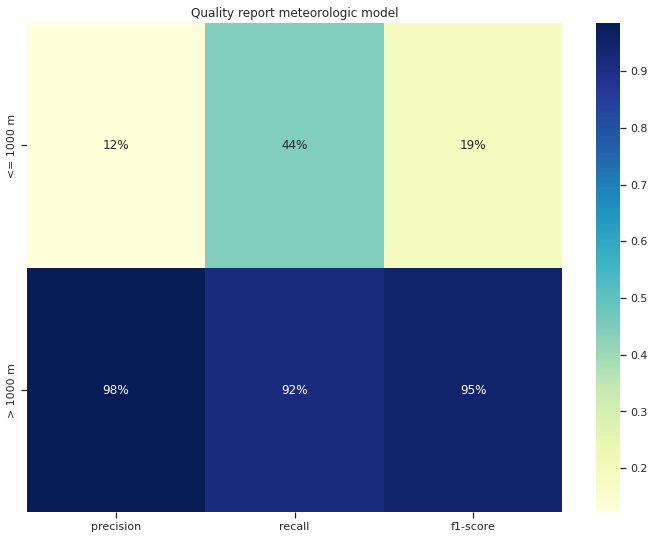

In [12]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all1k.vis_l, df_all1k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


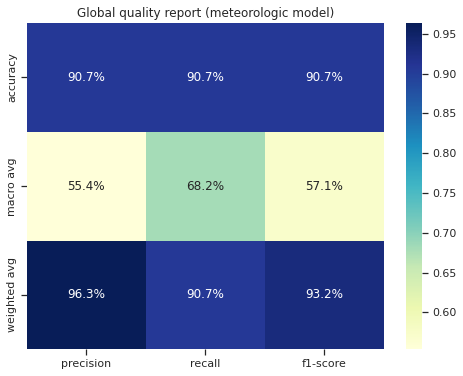

In [13]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

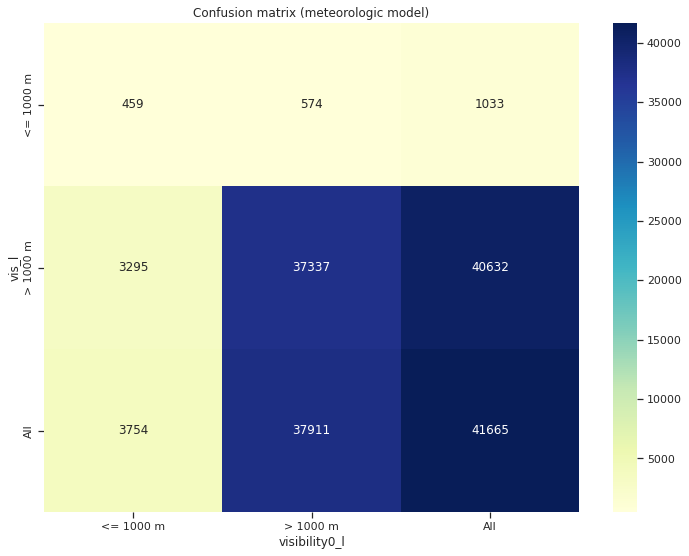

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")
import seaborn as sns
global_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

<ipython-input-15-c7e1f60e5f14>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



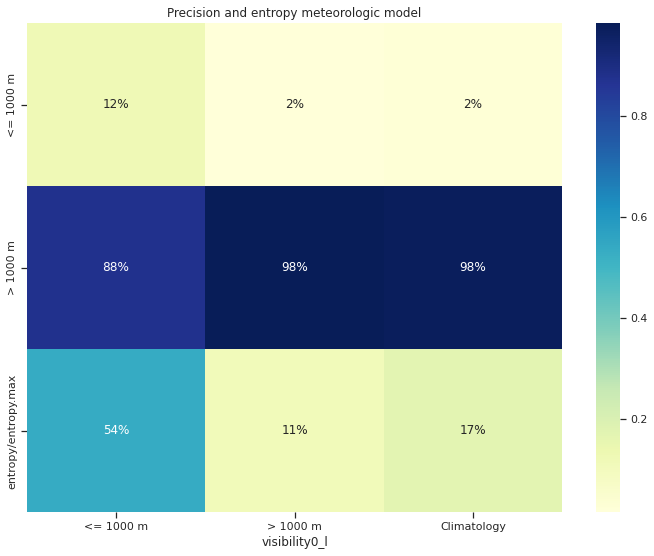

In [15]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [16]:
df_all1k = df_all1k.drop(columns=["visibility0_l","visibility1_l"])
df_all1k

,vis_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,> 1000 m,203.429932,0.0,854.856445,4.810002,11.869287,102894.039062,280.189117,0.941392,24051.365234,...,0.000000,-0.000477,0.2,0.000000,0.000000,0.200000,5556.550781,1547.730957,249.389938,273.540863
2018-01-01 02:00:00,> 1000 m,215.205261,0.0,896.619629,5.700827,12.852463,102861.617188,280.347931,0.988324,24039.359375,...,26.730000,-14.053461,0.2,0.120898,0.000000,0.200000,5565.350098,1546.713013,249.959381,273.725189
2018-01-01 03:00:00,> 1000 m,224.525986,0.0,921.870178,7.366050,16.131567,102839.406250,281.068298,0.952302,24040.320312,...,30.040001,-11.045238,0.2,0.164062,0.000000,0.200000,5573.533203,1546.541992,250.329880,273.646881
2018-01-01 04:00:00,> 1000 m,227.065903,0.0,940.589844,8.982346,17.282509,102842.039062,281.655243,0.923813,24042.085938,...,32.810001,-8.397157,0.1,0.437500,0.000000,0.437500,5580.626953,1548.500977,250.527191,273.661194
2018-01-01 05:00:00,> 1000 m,231.667892,0.0,983.509766,10.026832,18.146084,102827.226562,282.484192,0.924759,24040.648438,...,58.730000,-4.643547,0.1,0.375000,0.000000,0.375000,5585.084961,1548.863037,250.680435,273.858765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:00:00,> 1000 m,206.390732,0.0,2074.267090,13.522949,21.508442,101436.859375,286.881622,0.966220,6238.053223,...,8.360000,-3.452000,0.2,0.828125,0.656250,0.828125,5584.145020,1486.342041,257.560760,280.863312
2022-12-30 20:00:00,> 1000 m,203.653366,0.0,2074.872559,13.675614,21.609047,101487.148438,286.931366,0.958984,9636.106445,...,9.360000,-1.589551,0.1,0.781250,0.671875,0.781250,5587.791992,1489.608032,257.591125,280.822876
2022-12-30 21:00:00,> 1000 m,203.530945,0.0,2036.689697,12.965158,20.540071,101528.273438,286.895935,0.955559,8634.944336,...,11.790000,-0.158887,0.1,0.890625,0.796875,0.890625,5590.491211,1491.394043,257.582001,280.443878


**Machine learning**

In [17]:
#x variables
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [00:48<00:00,  1.66s/it]


In [ ]:
models

**ML LGBMClassifier**


Confusion matrix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        106        98   204
> 1000 m         186      7943  8129
All              292      8041  8333
Heidke Skill Score: 0.41

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.363014  0.519608  0.427419   204.000000
> 1000 m       0.987812  0.977119  0.982437  8129.000000
accuracy       0.965919  0.965919  0.965919     0.965919
macro avg      0.675413  0.748363  0.704928  8333.000000
weighted avg   0.972517  0.965919  0.968849  8333.000000

Confusion matrix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        100       111   211
> 1000 m         184      7938  8122
All              284      8049  8333
Heidke Skill Score: 0.39

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.352113  0.4739

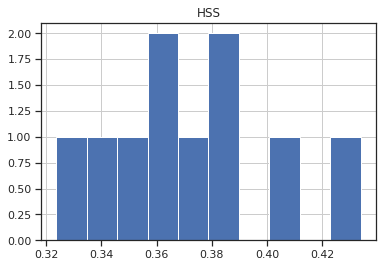

In [18]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning statistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();

**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.16) and at point 1 (0.17). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [19]:
import scipy.stats as stats

alpha = 0.01

#popmean point 1
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.16, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")


alpha:  0.01

HSS list from machine learning test: [0.41 0.39 0.37 0.32 0.39 0.36 0.36 0.43 0.36 0.34]

p_value point 0: 3.4209459166759808e-09

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [20]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

# variables X
df_all1k.iloc[:,1:].columns


Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        102       102   204
> 1000 m         162      7967  8129
All              264      8069  8333
Heidke Skill Score: 0.42

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.386364  0.500000  0.435897   204.000000
> 1000 m       0.987359  0.980071  0.983702  8129.000000
accuracy       0.968319  0.968319  0.968319     0.968319
macro avg      0.686861  0.740036  0.709800  8333.000000
weighted avg   0.972646  0.968319  0.970291  8333.000000

Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        107       104   211
> 1000 m         159      7963  8122
All              266      8067  8333
Heidke Skill Score: 0.43

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.402256  0.507109

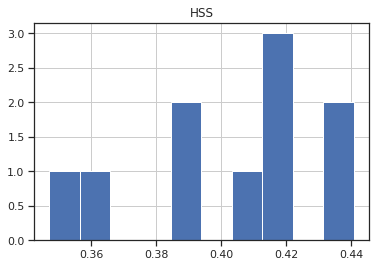

In [21]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [22]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.41  0.386 0.374 0.324 0.387 0.364 0.356 0.434 0.362 0.338]

HSS with time variables: [0.42  0.433 0.393 0.358 0.417 0.411 0.388 0.417 0.441 0.347]

alpha:  0.01

p_value point:  0.0034132085879978583

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


In [23]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 1.4%
snow_prec0: 0.1%
snowlevel0: 1.0%
mod0: 0.7%
wind_gust0: 1.3%
mslp0: 1.1%
temp0: 0.9%
rh0: 1.2%
visibility0: 1.6%
lhflx0: 1.3%
lwflx0: 1.0%
conv_prec0: 0.1%
prec0: 0.9%
swflx0: 0.8%
shflx0: 0.9%
cape0: 1.1%
cin0: 0.9%
cfh0: 1.1%
cfl0: 1.1%
cfm0: 0.4%
cft0: 0.6%
HGT5000: 0.9%
HGT8500: 0.7%
T5000: 1.1%
T8500: 1.0%
dir1: 1.8%
snow_prec1: 0.0%
snowlevel1: 1.4%
mod1: 0.8%
wind_gust1: 1.4%
mslp1: 1.1%
temp1: 1.6%
rh1: 1.4%
visibility1: 1.8%
lhflx1: 1.2%
lwflx1: 0.9%
conv_prec1: 0.1%
prec1: 1.0%
swflx1: 0.5%
shflx1: 1.6%
cape1: 1.3%
cin1: 1.1%
cfh1: 1.5%
cfl1: 0.9%
cfm1: 0.9%
cft1: 0.5%
HGT5001: 0.4%
HGT8501: 0.8%
T5001: 0.9%
T8501: 1.0%
dir2: 1.1%
snow_prec2: 0.0%
snowlevel2: 1.0%
mod2: 1.1%
wind_gust2: 1.9%
mslp2: 1.5%
temp2: 1.0%
rh2: 1.2%
visibility2: 1.9%
lhflx2: 0.9%
lwflx2: 0.9%
conv_prec2: 0.3%
prec2: 0.7%
swflx2: 0.8%
shflx2: 1.3%
cape2: 1.2%
cin2: 1.0%
cfh2: 1.1%
cfl2: 1.0%
cfm2: 0.4%
cft2: 0.7%
HGT5002: 0.5%
HGT8502: 0.7%
T5002: 0.9%
T8502: 1.3%
dir3: 1.0%
snow_prec3: 0.

In [24]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("vis_LEST_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m         98       106   204
> 1000 m          78      8051  8129
All              176      8157  8333
Heidke Skill Score: 0.5

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.556818  0.480392  0.515789   204.000000
> 1000 m       0.987005  0.990405  0.988702  8129.000000
accuracy       0.977919  0.977919  0.977919     0.977919
macro avg      0.771912  0.735398  0.752246  8333.000000
weighted avg   0.976474  0.977919  0.977125  8333.000000

Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        108       133   241
> 1000 m          71      8021  8092
All              179      8154  8333
Heidke Skill Score: 0.5

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.603352  0.448133  

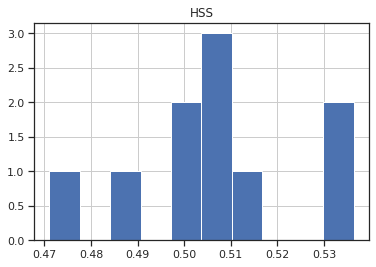

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

In [26]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 0.8%
snow_prec0: 0.0%
snowlevel0: 0.6%
mod0: 2.3%
wind_gust0: 3.4%
mslp0: 0.7%
temp0: 1.0%
rh0: 2.6%
visibility0: 3.0%
lhflx0: 1.2%
lwflx0: 0.6%
conv_prec0: 0.0%
prec0: 0.3%
swflx0: 0.9%
shflx0: 1.2%
cape0: 0.4%
cin0: 0.2%
cfh0: 0.5%
cfl0: 0.8%
cfm0: 0.4%
cft0: 0.6%
HGT5000: 0.6%
HGT8500: 0.6%
T5000: 0.6%
T8500: 0.7%
dir1: 0.8%
snow_prec1: 0.0%
snowlevel1: 0.7%
mod1: 2.0%
wind_gust1: 2.6%
mslp1: 0.7%
temp1: 1.0%
rh1: 3.1%
visibility1: 3.2%
lhflx1: 1.7%
lwflx1: 0.5%
conv_prec1: 0.0%
prec1: 0.3%
swflx1: 1.4%
shflx1: 1.2%
cape1: 0.5%
cin1: 0.3%
cfh1: 0.5%
cfl1: 1.0%
cfm1: 0.4%
cft1: 0.7%
HGT5001: 0.6%
HGT8501: 0.6%
T5001: 0.6%
T8501: 0.7%
dir2: 0.8%
snow_prec2: 0.0%
snowlevel2: 0.6%
mod2: 1.9%
wind_gust2: 2.8%
mslp2: 0.7%
temp2: 1.1%
rh2: 2.1%
visibility2: 2.3%
lhflx2: 1.7%
lwflx2: 0.6%
conv_prec2: 0.1%
prec2: 0.3%
swflx2: 0.8%
shflx2: 1.0%
cape2: 0.4%
cin2: 0.3%
cfh2: 0.5%
cfl2: 0.7%
cfm2: 0.4%
cft2: 0.7%
HGT5002: 0.6%
HGT8502: 0.6%
T5002: 0.6%
T8502: 0.7%
dir3: 0.9%
snow_prec3: 0.

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [27]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.42  0.433 0.393 0.358 0.417 0.411 0.388 0.417 0.441 0.347]

HSS with ExtraTreesClassifier: [0.505 0.502 0.507 0.511 0.536 0.509 0.471 0.536 0.503 0.488]

alpha:  0.01

p_value point:  8.346788583541293e-07

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier


In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("vis_LEST_d0.al", 'wb'))

Pipeline(steps=[('ml_model', ExtraTreesClassifier(n_estimators=200))])
